In [33]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sm
import scipy as sp
import copy as c
plt.style.use('bmh')

In [34]:
C,E,V1,x,x1,x2 = sm.symbols("C E V1 x x1 x2",real=True)
kArray = sm.Array([sm.sqrt(C*E),sm.sqrt(C*(E-V1)),sm.sqrt(C*E)])
M0 = sm.Matrix([[sm.exp(sm.I*kArray[0]*x),sm.exp(-sm.I*kArray[0]*x)],
            [sm.I*kArray[0]*sm.exp(sm.I*kArray[0]*x),-sm.I*kArray[0]*sm.exp(-sm.I*kArray[0]*x)]])
M1 = sm.Matrix([[sm.exp(sm.I*kArray[1]*x),sm.exp(-sm.I*kArray[1]*x)],
            [sm.I*kArray[1]*sm.exp(sm.I*kArray[1]*x),-sm.I*kArray[1]*sm.exp(-sm.I*kArray[1]*x)]])
M2 = sm.Matrix([[sm.exp(sm.I*kArray[2]*x),sm.exp(-sm.I*kArray[2]*x)],
            [sm.I*kArray[2]*sm.exp(sm.I*kArray[2]*x),-sm.I*kArray[2]*sm.exp(-sm.I*kArray[2]*x)]])
MArray = np.array([M0,M1,M2])

In [35]:
#Now to find the propagation matrix
P = sm.simplify(((c.deepcopy(M1).subs({x:x1})) * ((c.deepcopy(M1).subs({x:x2}))**(-1))),complex=True)
P

Matrix([
[                   (exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1))))*exp(-I*sqrt(C*(E - V1))*(x1 + x2))/2, I*sqrt(C*(E - V1))*(-exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1))))*exp(-I*sqrt(C*(E - V1))*(x1 + x2))/(2*C*(E - V1))],
[I*sqrt(C*(E - V1))*(exp(2*I*x1*sqrt(C*(E - V1))) - exp(2*I*x2*sqrt(C*(E - V1))))*exp(-I*sqrt(C*(E - V1))*(x1 + x2))/2,                                  (exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1))))*exp(-I*sqrt(C*(E - V1))*(x1 + x2))/2]])

In [36]:
#Lets make the substitution E -> V1
Peq = c.deepcopy(P).subs({V1:E})
Peq

Matrix([
[1, nan],
[0,   1]])

In [37]:
#The reason we got NaN is because we are not caraful with how we do the substitution
#If instead we take the limit :
sm.limit(c.deepcopy(P[1]),E,V1) #We get the expected term

x1 - x2

In [38]:
#Also inside the potential we get the simpler equation
#d^2/dx^2 psi = 0 , that has an obvious solution
#A1 + A2*x

In [39]:
#Ex 2.
#the final t matrix is:
t = sm.simplify(((c.deepcopy(M0).subs({x:x1}))**(-1)) * c.deepcopy(P) * c.deepcopy(M2).subs({x:x2}))
t

Matrix([
[(C*(E - V1)*(sqrt(C*E)*(exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1)))) + sqrt(C*(E - V1))*(exp(2*I*x1*sqrt(C*(E - V1))) - exp(2*I*x2*sqrt(C*(E - V1))))) + sqrt(C*E)*(C*(E - V1)*(exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1)))) + sqrt(C*E)*sqrt(C*(E - V1))*(exp(2*I*x1*sqrt(C*(E - V1))) - exp(2*I*x2*sqrt(C*(E - V1))))))*exp(I*(-x1*sqrt(C*E) + x2*sqrt(C*E) - sqrt(C*(E - V1))*(x1 + x2)))/(4*C*sqrt(C*E)*(E - V1)),                                                                                                                                                                                                                                                            V1*sqrt(C*(E - V1))*(-exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1))))*exp(-I*(x1*sqrt(C*E) + x1*sqrt(C*(E - V1)) + x2*sqrt(C*E) + x2*sqrt(C*(E - V1))))/(4*sqrt(C*E)*(E - V1))],
[                                                                                                             

In [40]:
#The transmition coeeficient is going to be:
T = (1/(t.row(1)[1] * sm.conjugate(t.row(1)[1]))).simplify()
T

16*C**2*sqrt(C*E)*(E - V1)**2*exp(I*(-x1*sqrt(C*E) + x1*conjugate(sqrt(C*E)) + 2*x1*conjugate(sqrt(C*(E - V1))) + x2*sqrt(C*E) - x2*conjugate(sqrt(C*E)) + 2*x2*conjugate(sqrt(C*(E - V1))) + sqrt(C*(E - V1))*(x1 + x2) - (x1 + x2)*conjugate(sqrt(C*(E - V1)))))/((C*(E - V1)*(sqrt(C*E)*(exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1)))) - sqrt(C*(E - V1))*(exp(2*I*x1*sqrt(C*(E - V1))) - exp(2*I*x2*sqrt(C*(E - V1))))) + sqrt(C*E)*(C*(E - V1)*(exp(2*I*x1*sqrt(C*(E - V1))) + exp(2*I*x2*sqrt(C*(E - V1)))) - sqrt(C*E)*sqrt(C*(E - V1))*(exp(2*I*x1*sqrt(C*(E - V1))) - exp(2*I*x2*sqrt(C*(E - V1))))))*(C*(E - V1)*((exp(2*I*x1*conjugate(sqrt(C*(E - V1)))) - exp(2*I*x2*conjugate(sqrt(C*(E - V1)))))*conjugate(sqrt(C*(E - V1))) + (exp(2*I*x1*conjugate(sqrt(C*(E - V1)))) + exp(2*I*x2*conjugate(sqrt(C*(E - V1)))))*conjugate(sqrt(C*E))) + (C*(E - V1)*(exp(2*I*x1*conjugate(sqrt(C*(E - V1)))) + exp(2*I*x2*conjugate(sqrt(C*(E - V1))))) + (exp(2*I*x1*conjugate(sqrt(C*(E - V1)))) - exp(2*I*x2*conjuga

In [41]:
firstCase = sm.simplify(c.deepcopy(T).subs({V1 : 50, C : 1, x1:0, x2:10 }))
firstCase
firstCaseCopy = c.deepcopy(firstCase)
energyValues = np.linspace(0,100,1000)
TValuesFirstCase = np.array([sm.re(firstCaseCopy.subs({E:element}).evalf()) for element in energyValues])

In [42]:
TValuesFirstCase

array([0, 1.40510998275127e-63, 3.23177234673937e-63,
       5.57561301948706e-63, 8.55169695750612e-63, 1.22982630346914e-62,
       1.69811534594764e-62, 2.27990643144132e-62, 2.99897666009845e-62,
       3.88374740330920e-62, 4.96815654792283e-62, 6.29269072587425e-62,
       7.90560644563638e-62, 9.86437422140460e-62, 1.22373858983115e-61,
       1.51059725612992e-61, 1.85667888846915e-61, 2.27346297564808e-61,
       2.77457567638073e-61, 3.37618259694683e-61, 4.09745247152490e-61,
       4.96110443938895e-61, 5.99405387532547e-61, 7.22817439406265e-61,
       8.70119678774378e-61, 1.04577693517484e-60, 1.25507084077133e-60,
       1.50424729603744e-60, 1.80069034645553e-60, 2.15312717926187e-60,
       2.57186978722024e-60, 3.06909983344445e-60, 3.65920441397917e-60,
       4.35917178448706e-60, 5.18905773087246e-60, 6.17253516449086e-60,
       7.33754176201029e-60, 8.71704310844563e-60, 1.03499319106427e-59,
       1.22820875115632e-59, 1.45676242522054e-59, 1.72703623147318e-5

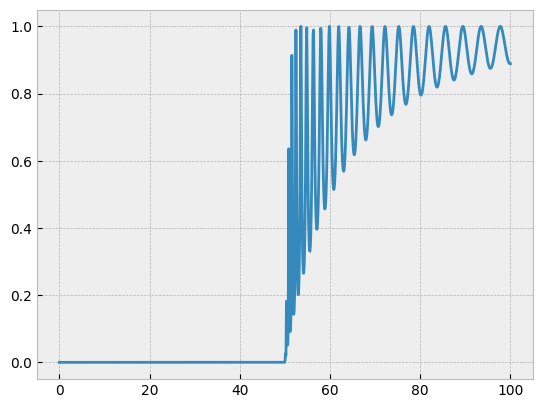

In [43]:
plt.plot(energyValues,TValuesFirstCase)